In [240]:
import pyodbc
import pandas as pd

In [241]:
conn = pyodbc.connect(
    r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=HASSN\SQLEXPRESS;'
    r'DATABASE=for_data_analsis;'
    r'Trusted_Connection=yes;'
)

df = pd.read_sql('SELECT * FROM personality', conn)
print(df.head())
conn.close()

   index  hours_daily_Alone Stage_fear  Social_event_attendance  \
0      0                4.0         No                      4.0   
1      1                9.0        Yes                      0.0   
2      2                9.0        Yes                      1.0   
3      3                0.0         No                      6.0   
4      4                3.0         No                      9.0   

   Going_outside Drained_after_socializing  Friends_circle_size  \
0            6.0                        No                 13.0   
1            0.0                       Yes                  0.0   
2            2.0                       Yes                  5.0   
3            7.0                        No                 14.0   
4            4.0                        No                  8.0   

   Post_frequency Personality  
0             5.0   Extrovert  
1             3.0   Introvert  
2             2.0   Introvert  
3             8.0   Extrovert  
4             5.0   Extrovert  


C:\Users\hassa\AppData\Local\Temp\ipykernel_23904\1034597386.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT * FROM personality', conn)


In [242]:
import pyodbc
print(pyodbc.drivers())

['SQL Server', 'Microsoft Access Driver (*.mdb, *.accdb)', 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)', 'Microsoft Access Text Driver (*.txt, *.csv)', 'Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)', 'SQL Server Native Client RDA 11.0', 'ODBC Driver 17 for SQL Server']


In [243]:
df

,index,hours_daily_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...,...
2895,2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert


In [244]:
df.isna().sum()

index                        0
hours_daily_Alone            0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [245]:
df1=df

In [246]:
df1['Stage_fear']=df1['Stage_fear'].map({'No':0,'Yes':1})
df1['Personality']=df1['Personality'].map({'Extrovert':1 ,'Introvert':0})
df1['Drained_after_socializing']=df1['Drained_after_socializing'].map({'No':0,'Yes':1})

In [247]:
df.dtypes

index                          int64
hours_daily_Alone            float64
Stage_fear                     int64
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing      int64
Friends_circle_size          float64
Post_frequency               float64
Personality                    int64
dtype: object

In [248]:
df.drop(['index'],axis=1)

,hours_daily_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1
...,...,...,...,...,...,...,...,...
2895,3.0,0,7.0,6.0,0,6.0,6.0,1
2896,3.0,0,8.0,3.0,0,14.0,9.0,1
2897,4.0,1,1.0,1.0,1,4.0,0.0,0
2898,11.0,1,1.0,3.0,1,2.0,0.0,0


In [249]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<Axes: >

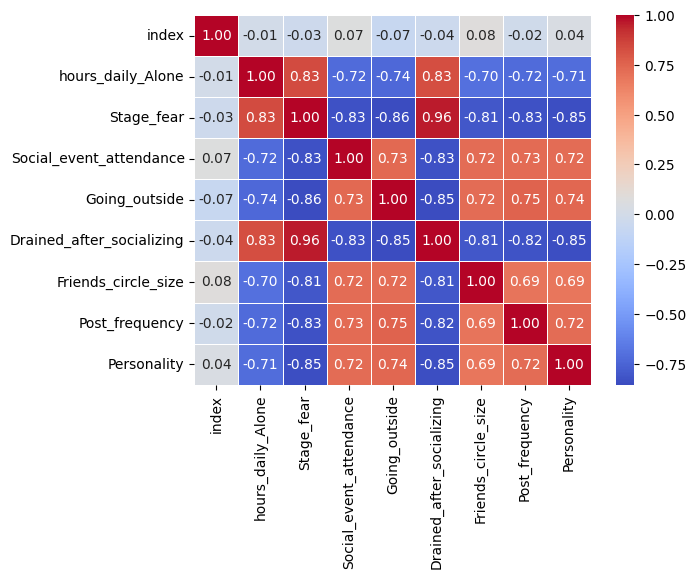

In [250]:
import seaborn as sns
cor=df1.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


In [251]:
X=df.drop(['index','Personality'],axis=1)
Y=df['Personality']

In [252]:
X

,hours_daily_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,4.0,0,4.0,6.0,0,13.0,5.0
1,9.0,1,0.0,0.0,1,0.0,3.0
2,9.0,1,1.0,2.0,1,5.0,2.0
3,0.0,0,6.0,7.0,0,14.0,8.0
4,3.0,0,9.0,4.0,0,8.0,5.0
...,...,...,...,...,...,...,...
2895,3.0,0,7.0,6.0,0,6.0,6.0
2896,3.0,0,8.0,3.0,0,14.0,9.0
2897,4.0,1,1.0,1.0,1,4.0,0.0
2898,11.0,1,1.0,3.0,1,2.0,0.0


In [253]:
!pip install scikit-learn

from sklearn.model_selection import train_test-split

In [254]:
from sklearn.model_selection import train_test_split

In [255]:
X_train,X_test,Y_train,Y_teat=train_test_split(X,Y,random_state=42)

In [256]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.linear_model import LogisticRegression

In [257]:
def convert_yes_no_columns(X):
    X = X.copy()
    yes_no_cols = ['Stage_fear', 'Drained_after_socializing']
    for col in yes_no_cols:
        if col in X.columns:
            X[col] = X[col].replace({'yes': 1, 'no': 0})
    return X

In [258]:
pipe_LogisticRegression=Pipeline([
    ('yes_no_converter', FunctionTransformer(convert_yes_no_columns, validate=False)),

    ('scaler',StandardScaler()),
    ('model',LogisticRegression())
])

In [259]:
pipe_LogisticRegression.fit(X_train,Y_train)

,steps,"[('yes_no_converter', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,func,<function con...002A121E9E200>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None


In [260]:
from sklearn.ensemble import RandomForestClassifier
pipe_RandomForstClassifier=Pipeline([
    ('yes_no_converter', FunctionTransformer(convert_yes_no_columns, validate=False)),

    
    ('model',RandomForestClassifier(n_estimators=100, random_state=42))
])

In [261]:
pipe_RandomForstClassifier.fit(X_train,Y_train)

,steps,"[('yes_no_converter', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,func,<function con...002A121E9E200>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None


In [262]:
LogisticRegression_y_pre=pipe_LogisticRegression.predict(X_test)

In [263]:
Y_teat

141     0
1557    1
485     0
1712    0
2250    0
       ..
649     0
522     0
1375    0
1113    0
1435    1
Name: Personality, Length: 725, dtype: int64

In [264]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy LogisticRegression_y_pre:", accuracy_score(Y_teat, LogisticRegression_y_pre))
print(confusion_matrix(Y_teat, LogisticRegression_y_pre))
print(classification_report(Y_teat, LogisticRegression_y_pre))

Accuracy LogisticRegression_y_pre: 0.9227586206896552
[[318  29]
 [ 27 351]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       347
           1       0.92      0.93      0.93       378

    accuracy                           0.92       725
   macro avg       0.92      0.92      0.92       725
weighted avg       0.92      0.92      0.92       725



In [265]:
confficients=pipe_LogisticRegression.named_steps['model'].coef_[0]
features=X_train.columns
importans_df=pd.DataFrame({
    'feat':features,
    'we':confficients
}).sort_values(by='we',ascending=False)

In [266]:
importans_df

,feat,we
6,Post_frequency,0.323730
3,Going_outside,0.182343
0,hours_daily_Alone,0.153624
2,Social_event_attendance,0.070130
5,Friends_circle_size,-0.302034
4,Drained_after_socializing,-1.267200
1,Stage_fear,-1.302220


In [267]:
test_acc=accuracy_score(Y_teat,LogisticRegression_y_pre)
print(test_acc)

0.9227586206896552


In [268]:
RandomForstClassifier_y_pre=pipe_RandomForstClassifier.predict(X_test)

In [269]:
print("Accuracy RandomForstClassifier:", accuracy_score(Y_teat, RandomForstClassifier_y_pre))
print(confusion_matrix(Y_teat, RandomForstClassifier_y_pre))
print(classification_report(Y_teat, RandomForstClassifier_y_pre))

Accuracy RandomForstClassifier: 0.9172413793103448
[[316  31]
 [ 29 349]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       347
           1       0.92      0.92      0.92       378

    accuracy                           0.92       725
   macro avg       0.92      0.92      0.92       725
weighted avg       0.92      0.92      0.92       725



In [270]:
importans=pipe_RandomForstClassifier.named_steps['model'].feature_importances_
features=X_train.columns
importans_df=pd.DataFrame({
    'feat':features,
    'we':importans
}).sort_values(by='we',ascending=False)

In [271]:
test_acc=accuracy_score(Y_teat,RandomForstClassifier_y_pre)
print(test_acc)

0.9172413793103448


In [272]:
print(importans_df)


                        feat        we
1                 Stage_fear  0.200508
0          hours_daily_Alone  0.181891
4  Drained_after_socializing  0.173404
2    Social_event_attendance  0.151466
6             Post_frequency  0.144153
3              Going_outside  0.085284
5        Friends_circle_size  0.063293


In [273]:
import joblib

In [274]:
joblib.dump(pipe_LogisticRegression,'LR_for_personality.pkl')

['LR_for_personality.pkl']

In [275]:
joblib.dump(pipe_RandomForstClassifier,'RF_for_personality.pkl')

['RF_for_personality.pkl']